From the given ‘Iris’ dataset, predict the optimum number of
clusters and represent it visually.

In [20]:
###---- Import required libraries ---###
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go

from sklearn import datasets
from sklearn.metrics import silhouette_score,davies_bouldin_score
from sklearn.cluster import KMeans

plt.style.use('fivethirtyeight')

## How to find Optimal  'k' value for k-means model ?
-----------------------------------------------------------------------------------------
There are 3 ways to find the optimal k value: 

1) Elbow Curve: Sum of squared distances of samples to their closest cluster center. It decreases with increasing number of clusters(k). **Aim is to find a value of k after which it turns into a straight line (approximately)**. Basically finding the curve point in the elbow graph

2) Silhouette Score: Score is calculated using mean of intra-cluster distance (a) and the mean of nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). We have to find a global maxima for this method.Silhouette coefficient exhibits a **peak** characteristic as compared to the gentle bend in the elbow method. This is easier to visualize and reason with.

3) Davies Bouldin Index: It is defined as a ratio between the cluster scatter and the cluster’s separation and a **lower** value will mean that the clustering is better.


In [21]:
# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values
Sum_of_squared_distances = []
sil = []
db = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k,  init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
    km = km.fit(x)
    labels = km.labels_
    sil.append(silhouette_score(x, labels, metric = 'euclidean'))
    db.append(davies_bouldin_score(x,labels))
    Sum_of_squared_distances.append(km.inertia_)

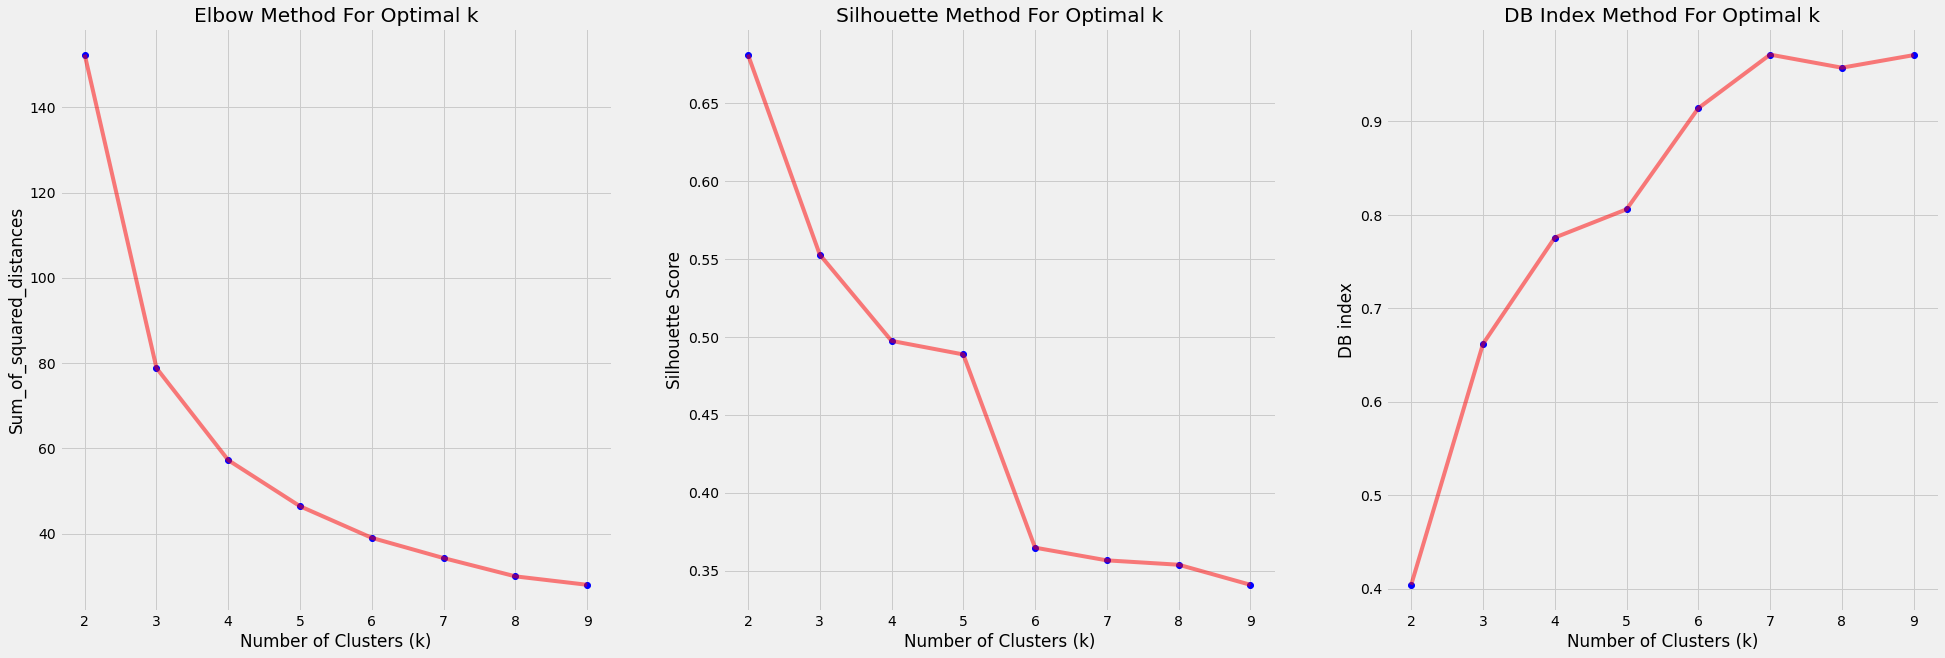

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols =3)
fig.set_figheight(10)
fig.set_figwidth(30)

ax1.plot(K, Sum_of_squared_distances, 'bo')
ax1.plot(K, Sum_of_squared_distances, 'r-', alpha = 0.5)
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Sum_of_squared_distances')
ax1.set_title('Elbow Method For Optimal k')
ax1.grid(True)

ax2.plot(K,sil, 'bo')
ax2.plot(K, sil, 'r-', alpha = 0.5)
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Method For Optimal k')
ax2.grid(True)

ax3.plot(K,db, 'bo')
ax3.plot(K, db, 'r-', alpha = 0.5)
ax3.set_xlabel('Number of Clusters (k)')
ax3.set_ylabel('DB index')
ax3.set_title('DB Index Method For Optimal k')
ax3.grid(True)

From the above graphs optimal 'k' value is **3** according to **elbow method** but is **2** accroding to **silhouette method**

In [24]:
for i in range(len(sil)):
    print("Silhouette Score for "+ str(i+2)+" clusters is : "+str(sil[i]))

Silhouette Score for 2 clusters is : 0.681046169211746
Silhouette Score for 3 clusters is : 0.5528190123564091
Silhouette Score for 4 clusters is : 0.49745518901737446
Silhouette Score for 5 clusters is : 0.4887488870931048
Silhouette Score for 6 clusters is : 0.3648340039670018
Silhouette Score for 7 clusters is : 0.3566882476581684
Silhouette Score for 8 clusters is : 0.35389584708910227
Silhouette Score for 9 clusters is : 0.34102346846395204


If you see the silhouette score mentioned above the next maximum value is for **3** clusters 

Thus, we can consider **3** as optimal k value since we have idea about the iris data prior to the programming

In [25]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

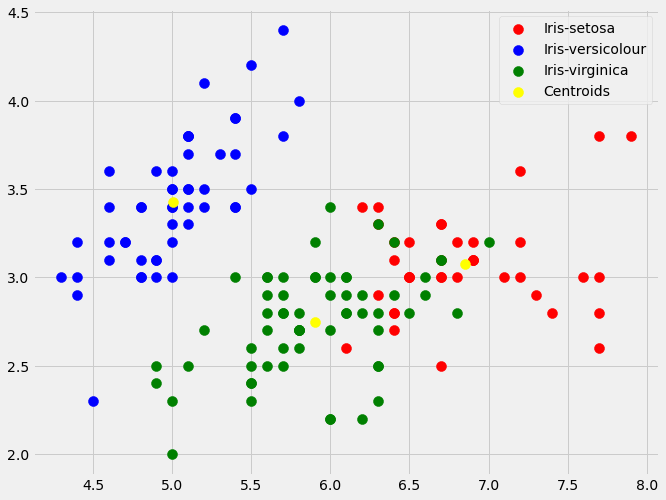

In [26]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(10,8))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

Reason for k = 2 being optimal value:
If you see in the plot above the clusters for **Iris-setosa(red)** and **Iris-Virginica(green)** are little bit mixed up 

### Let's try this on another dataset

#### Here I have taken customers dataset for customer segmentation

In [27]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Let's segement the clusters based on age

In [28]:
X1 = df[['Age','Spending Score (1-100)']].iloc[: , :].values
WSS = []
db = []
sil = []
K = range(2, 10)
for n in K:
    algorithm = (KMeans(n_clusters = n) )
    algorithm.fit(X1)
    labels = algorithm.labels_
    db.append(davies_bouldin_score(X1,labels))
    sil.append(silhouette_score(X1, labels, metric = 'euclidean'))
    WSS.append(algorithm.inertia_)

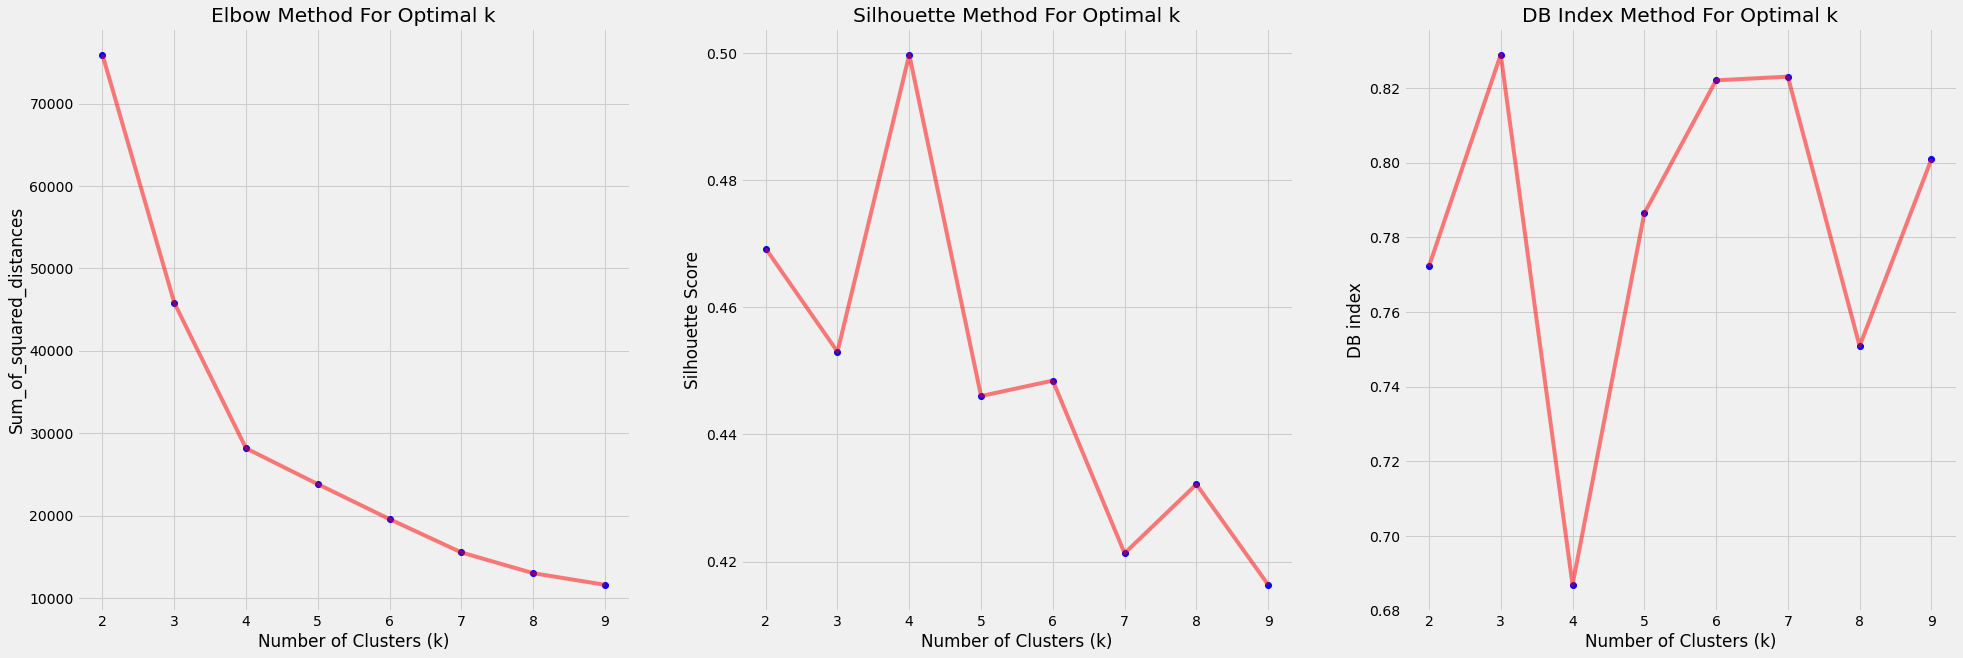

In [29]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols =3)
fig.set_figheight(10)
fig.set_figwidth(30)

ax1.plot(K, WSS, 'bo')
ax1.plot(K, WSS, 'r-', alpha = 0.5)
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Sum_of_squared_distances')
ax1.set_title('Elbow Method For Optimal k')
ax1.grid(True)

ax2.plot(K,sil, 'bo')
ax2.plot(K, sil, 'r-', alpha = 0.5)
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Method For Optimal k')
ax2.grid(True)

ax3.plot(K,db, 'bo')
ax3.plot(K, db, 'r-', alpha = 0.5)
ax3.set_xlabel('Number of Clusters (k)')
ax3.set_ylabel('DB index')
ax3.set_title('DB Index Method For Optimal k')
ax3.grid(True)

Here if you see optimal k value is **4** according to all the graphs

In [30]:
optimal_k = 4

In [31]:
# Applying kmeans to the dataset / Creating the kmeans classifier

kmeans = KMeans(n_clusters = optimal_k, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X1)

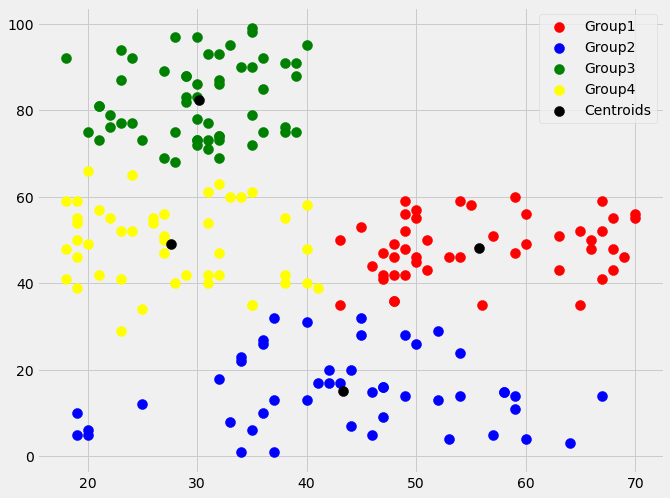

In [32]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(10,8))
colours = ['red','blue','green','yellow','cyan','magenta','orange','aqua','pink']
for i in range(optimal_k):
    plt.scatter(X1[y_kmeans == i, 0], X1[y_kmeans == i, 1], s = 100, c = colours[i], label = 'Group'+str(i+1))

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.legend()

In [33]:
# 4 distinguished clustrers!!

In [34]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, n_features=2,
                  random_state=0)

In [35]:
WSS = []
db = []
sil = []
K = range(2, 10)
for n in K:
    algorithm = (KMeans(n_clusters = n) )
    algorithm.fit(X)
    labels = algorithm.labels_
    db.append(davies_bouldin_score(X,labels))
    sil.append(silhouette_score(X, labels, metric = 'euclidean'))
    WSS.append(algorithm.inertia_)

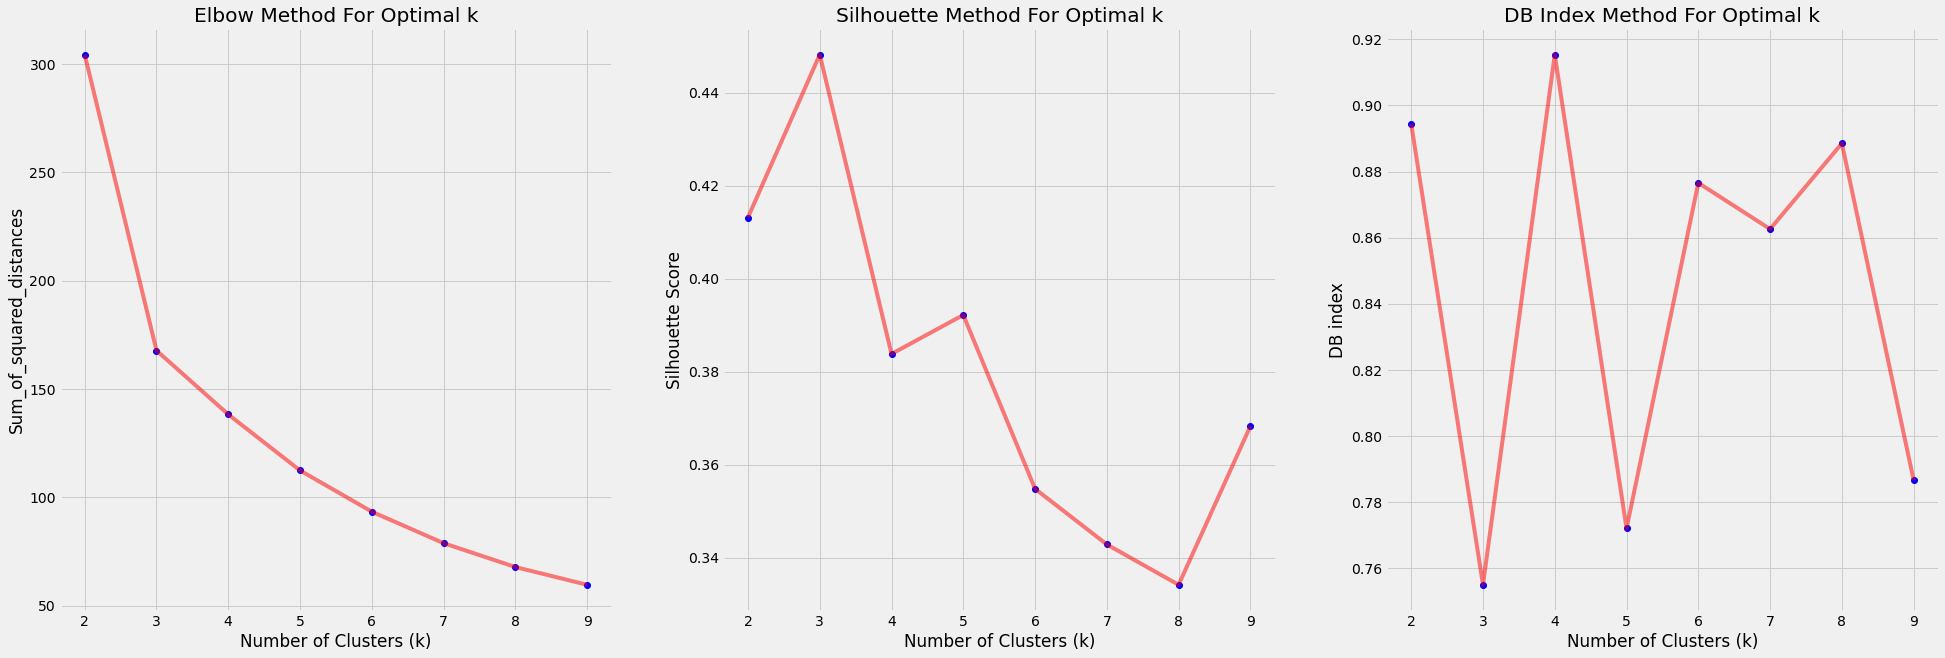

In [36]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols =3)
fig.set_figheight(10)
fig.set_figwidth(30)

ax1.plot(K, WSS, 'bo')
ax1.plot(K, WSS, 'r-', alpha = 0.5)
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Sum_of_squared_distances')
ax1.set_title('Elbow Method For Optimal k')
ax1.grid(True)

ax2.plot(K,sil, 'bo')
ax2.plot(K, sil, 'r-', alpha = 0.5)
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Method For Optimal k')
ax2.grid(True)

ax3.plot(K,db, 'bo')
ax3.plot(K, db, 'r-', alpha = 0.5)
ax3.set_xlabel('Number of Clusters (k)')
ax3.set_ylabel('DB index')
ax3.set_title('DB Index Method For Optimal k')
ax3.grid(True)

In [37]:
optimal_k = 3
kmeans = KMeans(n_clusters = optimal_k, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)

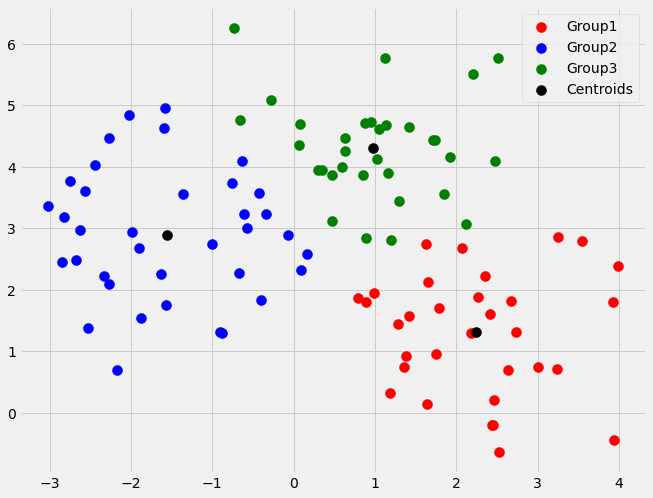

In [38]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(10,8))
colours = ['red','blue','green','yellow','cyan','magenta','orange','aqua','pink']
for i in range(optimal_k):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s = 100, c = colours[i], label = 'Group'+str(i+1))

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.legend()